# Data Analysis

# Intro
This project we will be breaking down games and seeing which are the most successful.
We will break sales down by platform, game and country.
I will manipulate data, then create visualizations for graphs and then I will test my hypothesis.

In [5]:
import pandas as pd

import numpy as np

import datetime as dt

import matplotlib as plot

import seaborn as sns

from scipy import stats as st

from functools import reduce

import matplotlib.pyplot as plt

from scipy.stats import shapiro

import plotly.express as px

from scipy.stats import ttest_ind

from scipy.stats import levene


%matplotlib inline

In [6]:
game = pd.read_csv('/datasets/games.csv')

print(game.shape)
print(game.info())
print(game.describe())
game.columns= game.columns.str.lower()

display(game)

(16715, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.8770

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


With the info output we see that most of the daya is good but their are some problems.
I will change the year to int.
Critic Score, User Score and Rating are all missing values.
We will fill the Critic and User score with values.
We will fill the Rating column with.

# Fixing Errors, Manipulating Data

In [7]:
game['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
# YR changed to float, User Score changed to float
game['user_score'] = pd.to_numeric(game['user_score'], errors='coerce')

#game['year_of_release'] = pd.to_datetime(game.year_of_release, format='%Y').dt.strftime('%Y')
game['year_of_release'] = game['year_of_release'].astype('Int64')
game.info()
display(game)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [58]:
columns = ['rating']
game[columns] = game[columns].fillna('undefined')
game = game.dropna(subset=['name','genre','year_of_release'])



game['user_score'] = game.groupby('name')['user_score'].apply(lambda x: x.fillna(x.mean()))
game['critic_score'] = game.groupby('name')['critic_score'].apply(lambda x: x.fillna(x.mean()))
game['user_score'] = game.groupby('genre')['user_score'].apply(lambda x: x.fillna(x.mean()))
game['critic_score'] = game.groupby('genre')['critic_score'].apply(lambda x: x.fillna(x.mean()))
#print(game)
display(game)
# Rating - None, No way to quantify
# User Score and Critic Score - Filled with the mean
# Name and Genre-Drop, Only 2 missing values
# Year of release - drop, dont want to misrepresent what year games were released.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,undefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,undefined,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,undefined,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,undefined,0.01


Rating - Undefined, No way to quantify
 User Score and Critic Score - Filled with the mean based upon game name(multiple platforms and same game). 
 If it wsnt found in name, filled with mean among the same genre.
 Name and Genre-Drop, Only 2 missing values
 Year of release - drop, dont want to misrepresent what year games were released.

In [59]:
sale = ['na_sales','eu_sales','jp_sales','other_sales']
game['total_sales'] = game[sale].sum(axis=1)

# Total Sales by Platform

All time it seems like the top 5 selling platforms are the PS2, X360, PS3, Wii and DS.

Text(0, 0.5, 'Platform')

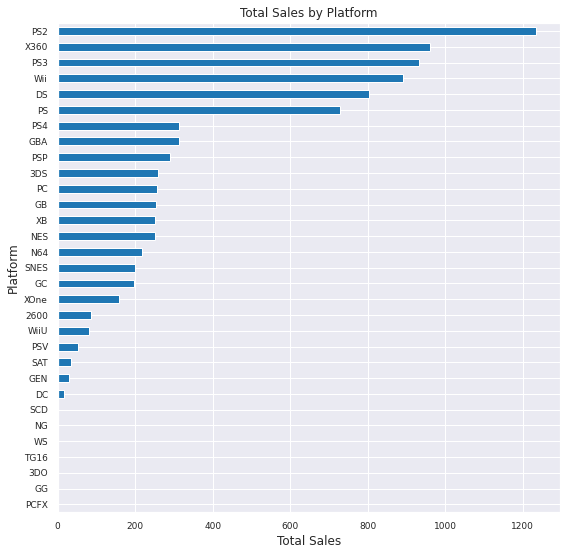

In [60]:
game_totals = game.groupby("platform")["total_sales"].sum().sort_values()
ax = game_totals.plot(kind="barh", fontsize=9, figsize=(9,9),title='Total Sales by Platform',ylabel='Total Sales',xlabel='Platform')
ax.set_xlabel("Total Sales")
ax.set_ylabel("Platform")
# PS2,X360,PS3, Wii,and DS have the most total sales all time. Doesn't show if those sales have fallen off or if they were from one specific time period, etc.

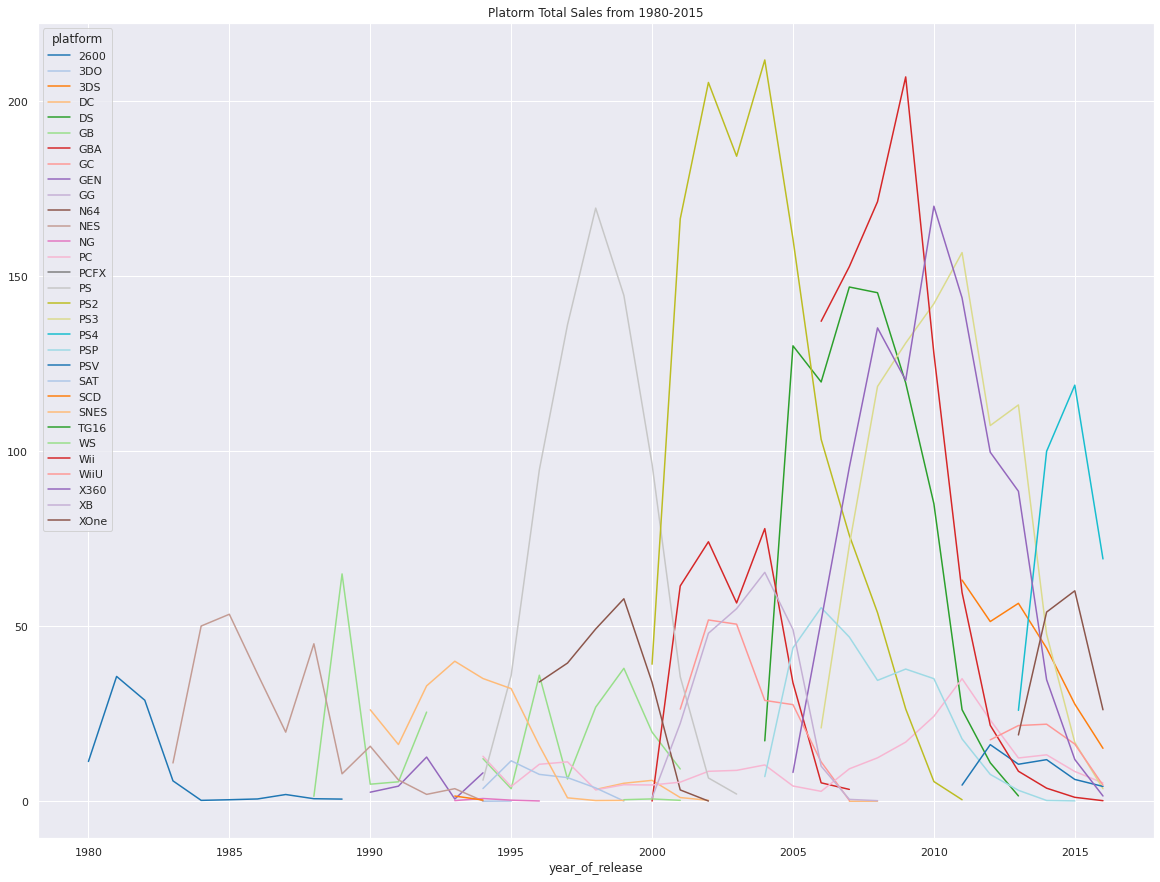

In [61]:
#Line chart showing all platforms and their respective flow of sales from 1985-2015
y = game.pivot_table(index='year_of_release',columns='platform',values='total_sales', aggfunc='sum').plot.line(figsize=(20,15),title='Platorm Total Sales from 1980-2015')


This line chart shows the total sales for platforms over a 30 year period.
This chart is important becuase it shows us when platforms were important.
It helps balance out the last chart as some platforms had alot of sales but it might have been in an irrelevant time period.

In [62]:
platform_yr = game.groupby(["platform",'year_of_release']).sum().sort_values("total_sales", ascending=False)
game_plat_year = game.pivot_table(index=['platform','year_of_release'],values='total_sales',aggfunc='sum')
game_plat_year
#Grouped by Total Sales by Platform by Year to create a graph to see whose sales are growing/dying and the time period of the sales.

total_sales
platform year_of_release             
2600     1980                   11.38
         1981                   35.68
         1982                   28.88
         1983                    5.84
         1984                    0.27
...                               ...
XB       2008                    0.18
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

[238 rows x 1 columns]

# Total Gaming Sales Trends
It seems that gaming was unpopular into late 90s. 
In the early 2000s sales start to pick up and hit a peak in 2010.
Sales started to decline in the 2010s but they are still high compared to it's history.

Text(0, 0.5, 'Total Sales')

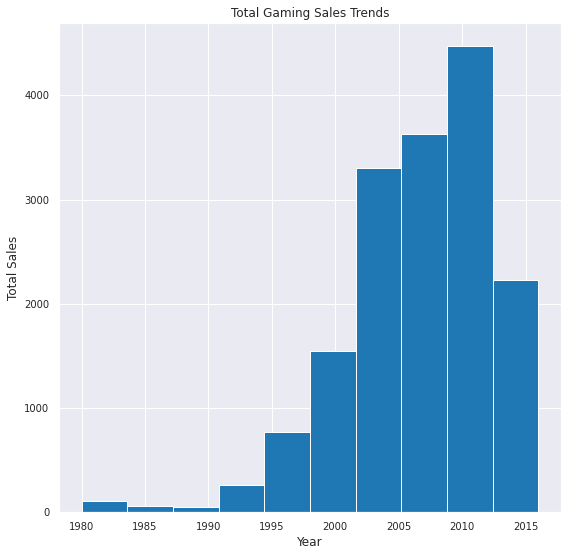

In [63]:
total_gaming = game['year_of_release']
ax = total_gaming.plot(kind="hist", fontsize=10, figsize=(9,9),title='Total Gaming Sales Trends',ylabel='Year',xlabel='Total Sales')
ax.set_xlabel("Year")
ax.set_ylabel("Total Sales")

Platforms that were popular but now have 0 sales: PS2, Wii, DS, PS

How long it takes for new platforms to appear: 4 years

How long it takes for old platforms to fade away: 10 years

In [64]:
game2= (game.query('year_of_release > 2010').pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],aggfunc='sum'))
game2

,eu_sales,jp_sales,na_sales,other_sales,total_sales
platform,,,,,
3DS,61.27,100.62,82.65,13.27,257.81
DS,9.24,8.04,18.86,2.59,38.73
PC,56.70,0.00,29.88,11.10,97.68
PS2,0.13,0.09,0.13,0.10,0.45
PS3,163.10,49.39,168.26,64.82,445.57
PS4,141.09,15.96,108.74,48.35,314.14
PSP,1.77,24.04,2.19,1.01,29.01
PSV,13.07,21.84,12.47,6.43,53.81
Wii,29.60,8.97,48.56,7.89,95.02


# Popular Platforms by Country
Microsoft products(XOne and X360) are most popular in North America.

Sony(PS3 and PS4) is huge in Europe.

Nintendo(3DS) is extermely popular in Japan.

In [65]:
g =('PS3','PS4','X360','3DS','XOne')
game2 = game.loc[game['platform'].isin(g)]
#game2['platform'].hist(bins=30, alpha=0.8,figsize=(6,6))
#game2

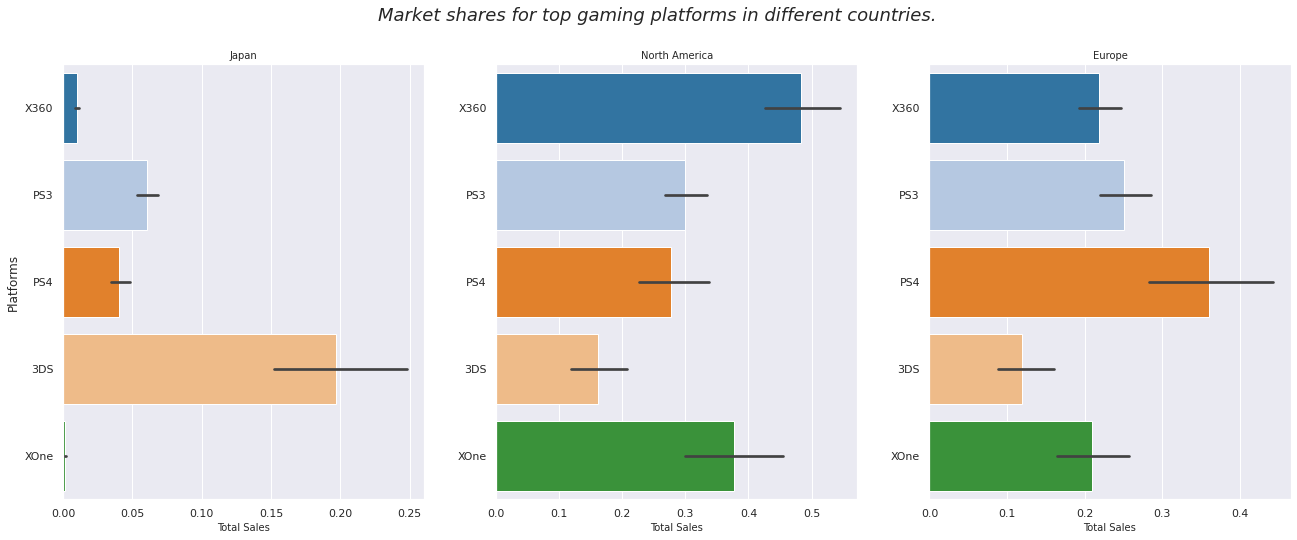

In [66]:
sns.set_theme(palette='tab20', style='darkgrid')
fig, axs= plt.subplots(1,3, figsize=(22,8))

sns.barplot(x='eu_sales', y='platform', data=game2, ax=axs[2])
axs[2].set_title('Europe',fontsize=10)
axs[2].set_xlabel('Total Sales', fontsize=10)
axs[2].set(ylabel=None)

sns.barplot(x='na_sales', y='platform', data=game2, ax=axs[1])
axs[1].set_title('North America',fontsize=10)
axs[1].set(ylabel=None)
axs[1].set_xlabel('Total Sales',fontsize=10)

sns.barplot(x='jp_sales', y='platform', data=game2, ax=axs[0])
axs[0].set_title('Japan',fontsize=10)
axs[0].set(ylabel='Platforms')
axs[0].set_xlabel('Total Sales',fontsize=10)

plt.suptitle('Market shares for top gaming platforms in different countries.',fontsize=18,style='oblique');

# Top Genres between Platforms and Countries

Roleplaying and Simulation are strong in Japan, whilst Shooters, Action and Racing are big in Europe and North America.

The most profitable genres are Shooters and then Role-Playing.

Puzzle, Strategy and Adventure are low sales between all regions. 
I imagine that they aren't popular genres between the top platforms.


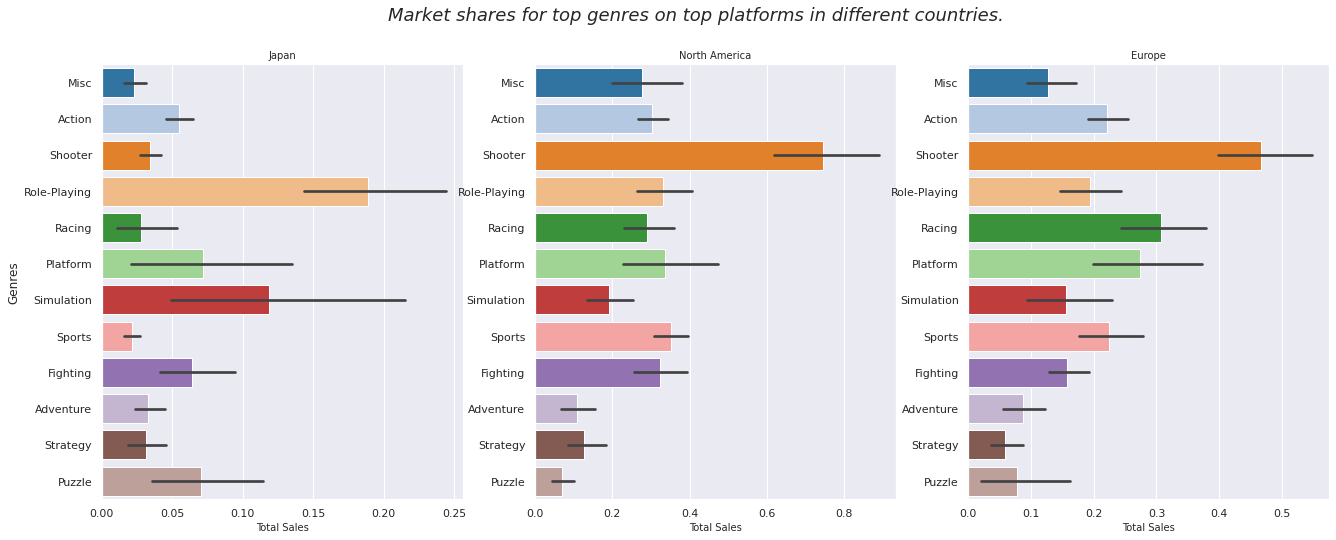

In [67]:
fig, axs= plt.subplots(1,3, figsize=(22,8))

sns.barplot(x='eu_sales', y='genre', data=game2, ax=axs[2])
axs[2].set_title('Europe',fontsize=10)
axs[2].set_xlabel('Total Sales', fontsize=10)
axs[2].set(ylabel=None)

sns.barplot(x='na_sales', y='genre', data=game2, ax=axs[1])
axs[1].set_title('North America',fontsize=10)
axs[1].set(ylabel=None)
axs[1].set_xlabel('Total Sales',fontsize=10)

sns.barplot(x='jp_sales', y='genre', data=game2, ax=axs[0])
axs[0].set_title('Japan',fontsize=10)
axs[0].set(ylabel='Genres')
axs[0].set_xlabel('Total Sales',fontsize=10)

plt.suptitle('Market shares for top genres on top platforms in different countries.',fontsize=18,style='oblique');

# ESRB ratings for Total Sales
E, E10+, M and T are the top ESRB ratings for total sales in all the regions.

array([<AxesSubplot:ylabel='eu_sales'>, <AxesSubplot:ylabel='jp_sales'>,
       <AxesSubplot:ylabel='na_sales'>], dtype=object)

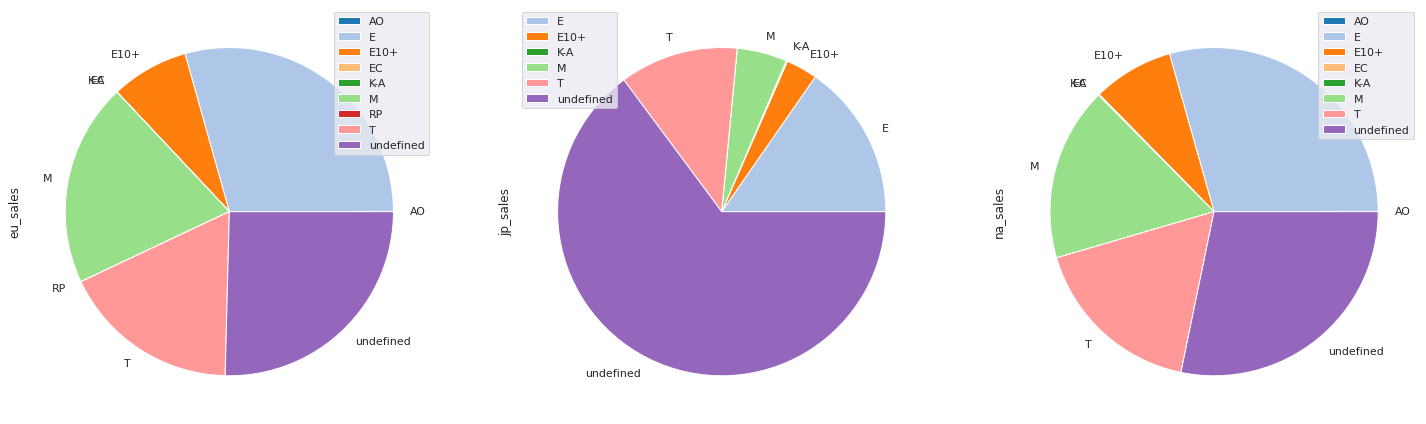

In [68]:
ratingtotalsale = game.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum').plot.pie(subplots=True,figsize=(25,10))
ratingtotalsale

# PS3 User and Critic Reviews

In [69]:
game3 = game[game['platform'] == 'PS3'] 
game3 = game3[game3['critic_score'] > 0]
game3 = game3[game3['user_score'] > 0]


,total_sales,critic_score,user_score
total_sales,1.000000,0.510845,0.105682
critic_score,0.510845,1.000000,0.572460
user_score,0.105682,0.572460,1.000000


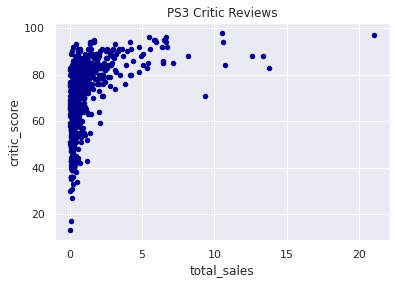

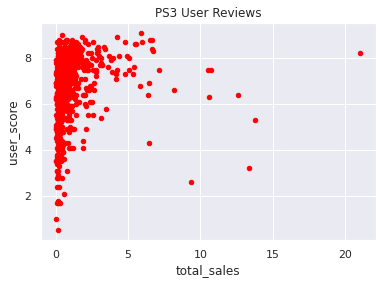

In [70]:
ps3critic = game3.plot.scatter(x='total_sales', y='critic_score',c='DarkBlue', title='PS3 Critic Reviews')
ps3user = game3.plot.scatter(x='total_sales', y='user_score',c='red', title= 'PS3 User Reviews')
ps3_corr = game3.pivot_table(index='total_sales', values=['user_score','critic_score']).reset_index()
ps3_corr.corr()

Both have small correlation. 
PS3 Critic has a higher correlation score than User but they both arent strong.
These relationships are displayed on the graphs.

# Market Share for Platform by Country

In [71]:
g =('PS3','PS4','X360','3DS','XOne')
game4 = game.loc[game['platform'].isin(g)]

Text(0.5, 0.98, 'Market shares for ratings on top platforms in different countries.')

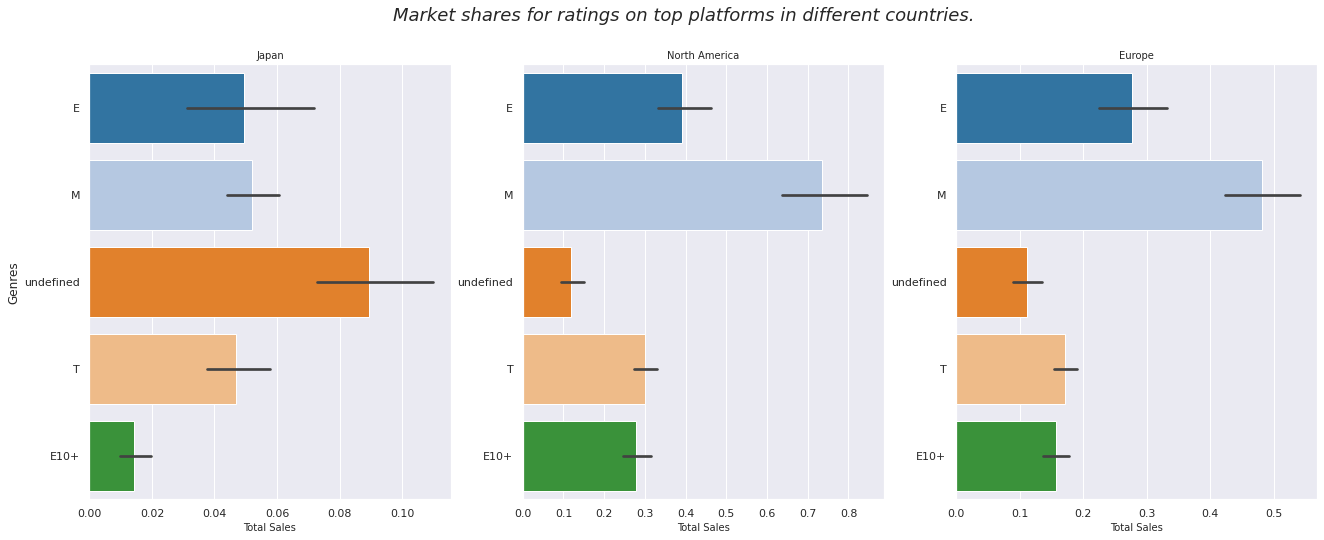

In [72]:
fig, axs= plt.subplots(1,3, figsize=(22,8))

sns.barplot(x='eu_sales', y='rating', data=game4, ax=axs[2])
axs[2].set_title('Europe',fontsize=10)
axs[2].set_xlabel('Total Sales', fontsize=10)
axs[2].set(ylabel=None)

sns.barplot(x='na_sales', y='rating', data=game4, ax=axs[1])
axs[1].set_title('North America',fontsize=10)
axs[1].set(ylabel=None)
axs[1].set_xlabel('Total Sales',fontsize=10)

sns.barplot(x='jp_sales', y='rating', data=game4, ax=axs[0])
axs[0].set_title('Japan',fontsize=10)
axs[0].set(ylabel='Genres')
axs[0].set_xlabel('Total Sales',fontsize=10)

plt.suptitle('Market shares for ratings on top platforms in different countries.',fontsize=18,style='oblique')

# Total Sales by Game by Platform
The sony product when sold on various platforms usually sold more in relation to its competitiors.

<AxesSubplot:title={'center':'Total sales by game by platform'}, xlabel='name,platform'>

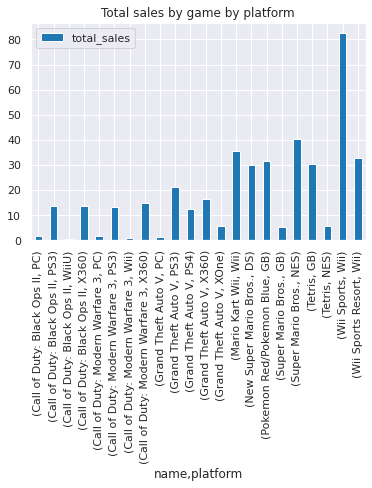

In [73]:
#Compare the sales of the same games on other platforms
#maybe top 10-20 and looknat their sales across the different platforms. That would look like :
#Subsetting data to most popular games
#making a groupped bar chart of the sales on different playtform a for each game
k = game.pivot_table(index='name',values=['total_sales'],aggfunc='sum').sort_values(by='total_sales',ascending=False)
hk =('Wii Sports','Grand Theft Auto V','Super Mario Bros.','Tetris','Mario Kart Wii','Wii Sports Resort','Pokemon Red/Pokemon Blue','Call of Duty: Modern Warfare 3','New Super Mario Bros.','Call of Duty: Black Ops II')
game5 = game.loc[game['name'].isin(hk)]
game5.pivot_table(index=['name','platform'],values='total_sales',aggfunc='sum').plot.bar(title='Total sales by game by platform')


# Hypothesis Testing

# Hypothesis One: Avg User Rating for X-Box One/PC are the same. 

The Null hypothesis (H0) is that the average user ratings of the Xbox One and PC platforms belongs to the same statistical population.

The Alternative hypothesis (H1) is that the average user ratings of the Xbox One and PC platforms doesn't belong to the same statistical population.

The significance level be 0.05.

In [74]:
xboxrate = game.query('platform == "XOne"')
pcrate = game.query('platform == "PC"')

xboxrateuser = xboxrate.pivot_table(index=['year_of_release', 'platform'], values=['user_score']).reset_index()
pcrateuser = pcrate.pivot_table(index=['year_of_release', 'platform'], values=['user_score']).reset_index()

xbox = xboxrateuser['user_score']
pc = pcrateuser['user_score']

stat, p = levene(xbox, pc)
print("p-value from test: ", p.round(5))

alpha = 0.05 

results = st.ttest_ind(xbox,pc, equal_var=True)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value from test:  0.12035
p-value: 0.78319574565435
We can't reject the null hypothesis


# Hypothesis Two: Avg User Rating for Action/Sports are different. 

The Null hypothesis (H0) : the average user ratings of the Action and Sports are belongs to the same statistical population.
    
The Alternative hypothesis (H1) : the average user ratings of the Action and Sports are not belongs to the same statistical population.
    
The significance level be 0.05.

In [75]:
actiongenre = game.query('genre == "Action"')
sportgenre = game.query('genre == "Sports"')

actionuser = actiongenre.pivot_table(index=['year_of_release', 'genre'], values=['user_score']).reset_index()
sportuser = sportgenre.pivot_table(index=['year_of_release', 'genre'], values=['user_score']).reset_index()

action = actionuser['user_score']
sports = sportuser['user_score']

stat, p = levene(action, sports)
print("p-value from test: ", p.round(5))

alpha = 0.05 

results = st.ttest_ind(action,sports, equal_var=True)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value from test:  0.79198
p-value: 0.6646898017039122
We can't reject the null hypothesis


# Conclusion


The analysis showed that users from different areas prefer different genres. Action, Shooters, and Sports are sought after in the western countries, While the eastern market is focused mainly on Role-Playing and Simulation.

Just as genres are different in the various regions so are the preferred platforms. In North America, customers prefer Microsoft products(XOne & X360). In Europe, Sony is the preferred manufacturer with PS3 and PS4 leading the way. Nintendo(3DS) is the most popular in Japan which is no surprise as Nintendo was created in Japan.

M(Mature) and E(Everyone) are the most popular among the three regions. If games were to be sold in any of the regions they should definetily aim to have the game in one of those two rating classes.